# Timesfm-2.5 Usage Example

## Loading Timesfm-2.5 Model

In [1]:
import numpy as np
import os
import sys

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)
print(f"src_path: {src_path}")

from samay.model import TimesFM_2p5_Model
from samay.dataset import TimesFM_2P5_Dataset
from samay.utils import load_args, visualize

arg_path = "../config/timesfm_2p5.json"
args = load_args(arg_path)
model = TimesFM_2p5_Model(**args)

src_path: /nethome/sli999/Samay/src


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
INFO:p-1279300:t-140075744466752:timesfm_2p5_torch.py:load_checkpoint:Downloading checkpoint from Hugging Face repo google/timesfm-2.5-200m-pytorch


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:p-1279300:t-140075744466752:timesfm_2p5_torch.py:load_checkpoint:Loading checkpoint from: /nethome/sli999/.cache/huggingface/hub/models--google--timesfm-2.5-200m-pytorch/snapshots/26233fffa726cf3259addc2f2fedbbeaf420a79f/model.safetensors


## Define the datasets. 

In [2]:
# train_dataset = TimesFM_2P5_Dataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv', 
#                              mode='train', batch_size=32, context_len=512, horizon_len=96, task_name="finetune")
val_dataset = TimesFM_2P5_Dataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv',
                             mode='test', batch_size=128, context_len=512, horizon_len=96)

## Evaluate the zero-shot forecasting

In [3]:
metric, trues, preds, histories = model.evaluate(val_dataset)
print(metric)

{'mse': 0.503595, 'mae': 0.45355812, 'mase': 1.566824, 'mape': -0.25902012, 'rmse': 0.70964426, 'nrmse': 0.0745867047923878, 'smape': 0.7499223, 'msis': 0.07465121, 'nd': 20.290075158600903, 'mwsq': 0.21745436, 'crps': 0.481210515070454}


## Visualize the zero-shot results. 

(462, 7, 512)


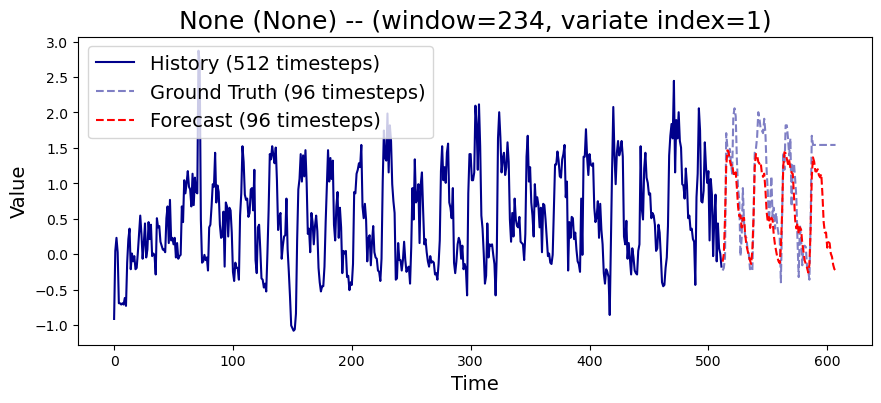

In [4]:
visualize(trues=trues, preds=preds, history=histories, context_len=512)